In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
cd /content/../root/.kaggle

/root/.kaggle


In [74]:
ls -al

total 16
drwxr-xr-x 2 root root 4096 Jun  4 05:39 ./
drwx------ 1 root root 4096 Jun  4 05:38 ../
-rw-r--r-- 1 root root   68 Jun  4 05:39 kaggle.json


In [75]:
from google.colab import files
uploaded = files.upload()

In [136]:
cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [77]:
ls -al

total 3306
-rw------- 1 root root    5568 Mar 19 06:56  assignment_week3.ipynb
-rw------- 1 root root   42954 May 28 05:15  chap8.ipynb
-rw------- 1 root root  128771 Oct 22  2023 'Colaboratory에 오신 것을 환영합니다의 사본'
-rw------- 1 root root  128771 Oct 22  2023 'Colaboratory에 오신 것을 환영합니다의 사본 (1)'
drwx------ 2 root root    4096 Apr  2 05:13  covid19/
drwx------ 2 root root    4096 May 28 02:49  ecg/
-rw------- 1 root root  137366 Jun  4 05:38  finalProject.ipynb
drwx------ 2 root root    4096 Apr  2 04:49  .ipynb_checkpoints/
-rw------- 1 root root      68 Jun  4 05:35  kaggle.json
drwx------ 3 root root    4096 Jun  4 05:32  pknu-deep-learning-2024/
drwx------ 2 root root    4096 May 24 10:01  svc2004/
-rw------- 1 root root    5413 Jun  4 05:36  test_predict.csv
drwx------ 2 root root    4096 Apr  2 04:49  titanic/
-rw------- 1 root root     734 Apr  2 05:17  Untitled0.ipynb
-rw------- 1 root root  277114 Apr 23 07:54  Untitled1.ipynb
-rw------- 1 roo

In [78]:
ls '/content/gdrive/MyDrive/Colab Notebooks/pknu-deep-learning-2024/rowdata/rowdata/Train' | wc -l

800


In [79]:
folderpath = '/content/gdrive/MyDrive/Colab Notebooks/pknu-deep-learning-2024/rowdata/rowdata'

In [80]:
import random
import tensorflow as tf
seed_num = 71
random.seed(seed_num)

In [81]:
import numpy as np
import os


# 파라미터로 학습 및 테스트 폴더의 모든 서명 데이터를 읽고
#전체 서명의 길이 중 가장 긴 길이의 값을 반환
def get_max_len(folderpath_train, folderpath_test):
  n_max_len = 0
  for filename in os.listdir(folderpath_train):
    filepath = f'{folderpath_train}/{filename}'
    d, tmp = load_a_sig(filepath)
    if d.shape[0] > n_max_len:
      n_max_len = d.shape[0]

  for filename in os.listdir(folderpath_test):
    filepath = f'{folderpath_test}/{filename}'
    d,tmp = load_a_sig(filepath)
    if d.shape[0] > n_max_len:
      n_max_len = d.shape[0]

  return n_max_len

# 파라미터로 주어진 폴더에 들어 있는 서명 파일 전체를 읽고,
#n_files * n_max_len * 2 크기의 numpy 배열로 만들어 반환
# 파라미터 n_max_len은 전체 서명 데이터들 중 가장 긴 서며야의 길이를 의미

# 데이터와 함께 반환하는 len_sign 는 각 서명의 실제 길이를 의미

def load_data(folderpath, n_max_len, sig_ids):
  filelist = os.listdir(folderpath)
  n_files = len(filelist)
  d = np.zeros((n_files, n_max_len,2))

  len_sign = np.zeros(n_files)

  for i in sig_ids:
    filepath = f'{folderpath}/{i}.TXT'
    d_tmp, len_sign[i-sig_ids[0]] = load_a_sig(filepath)

    d[i-sig_ids[0],:d_tmp.shape[0],:] = d_tmp
  return d,len_sign


# 파라미터로 주어진 서명 파일을 읽고, nPoint * 2 크기의 numpy 배열로 만들어 반환

def load_a_sig(filepath):
  f = open(filepath,'rt')
  nPoints = int(f.readline())

  d = np.zeros((nPoints,2))
  for i in range(nPoints):
    line = f.readline()
    toks = line.split(' ')
    d[i,:] = [int(toks[0]), int(toks[1])]
  f.close()
  return d, nPoints

In [82]:
n_train = 800
n_test = 800

n_max_len = get_max_len(f'{folderpath}/Train', f'{folderpath}/Test')

x_train, x_train_len = load_data(f'{folderpath}/Train', n_max_len,range(n_train))

x_test, x_test_len = load_data(f'{folderpath}/Test', n_max_len, range(n_train,1600))

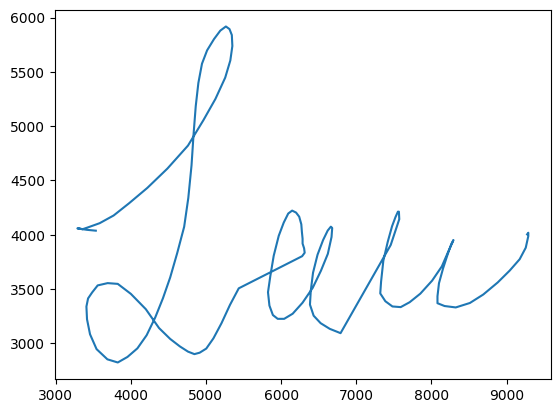

In [83]:
import matplotlib.pyplot as plt
s_id = 10
len_sig = int(x_train_len[s_id])
plt.plot(x_train[s_id,:len_sig,0], x_train[s_id, :len_sig,1])

In [84]:
for i in range(x_train.shape[0]):
  len_tmp = int(x_train_len[i])
  h_min = np.min(x_train[i,:len_tmp,0])
  h_max = np.max(x_train[i,:len_tmp,0])
  v_min = np.min(x_train[i,:len_tmp,1])
  v_max = np.max(x_train[i,:len_tmp,1])
  w_h_ratio = (v_max - v_min) / (h_max - h_min)
  x_train[i,:len_tmp,0] = (x_train[i,:len_tmp,0] - h_min) / (h_max - h_min)
  x_train[i,:len_tmp,1] = (x_train[i,:len_tmp,1] - v_min) / (v_max - v_min) * w_h_ratio

for i in range(x_test.shape[0]):
  len_tmp = int(x_test_len[i])
  h_min = np.min(x_test[i,:len_tmp,0])
  h_max = np.max(x_test[i,:len_tmp,0])
  v_min = np.min(x_test[i,:len_tmp,1])
  v_max = np.max(x_test[i,:len_tmp,1])

  w_h_ratio = (v_max - v_min) / (h_max - h_min)

  x_test[i,:len_tmp,0] = (x_test[i,:len_tmp,0] - h_min) / (h_max - h_min)
  x_test[i,:len_tmp,1] = (x_test[i,:len_tmp,1] - v_min) / (v_max - v_min) * w_h_ratio


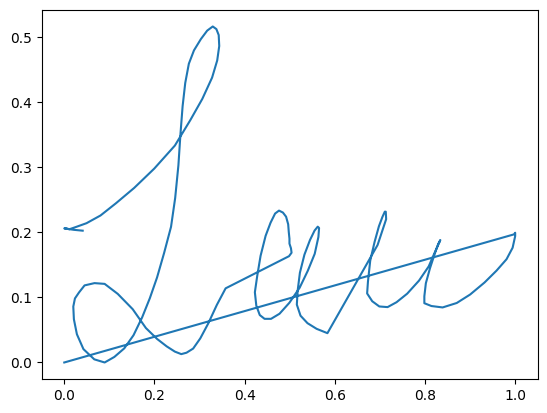

In [85]:
import matplotlib.pyplot as plt
s_id = 10
plt.plot(x_train[s_id,:,0],x_train[s_id,:,1])

In [86]:
import pandas as pd
from tensorflow import keras

y_pd = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/pknu-deep-learning-2024/train_info.csv')
y_all = np.array(y_pd['bGenuine'])
y_train = y_all[:n_train]
y_train_cat = keras.utils.to_categorical(y_train)
# y_test = y_all[:n_train]


In [109]:
from keras.layers import *
from keras import Sequential
from keras.optimizers import Adam
tf.random.set_seed(seed_num)

model = Sequential()
model.add(Conv1D(16, kernel_size=6, padding='same', activation='relu'))
model.add(Conv1D(16, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=6, strides=2))

model.add(Conv1D(32, kernel_size=6, padding='same', activation='relu'))
model.add(Conv1D(32, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=6, strides=2))

model.add(Conv1D(64, kernel_size=6, padding='same', activation='relu'))
model.add(Conv1D(64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=6, strides=2))

model.add(Bidirectional(LSTM(128)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))



In [113]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

hist = model.fit(x=x_train, y=y_train_cat, epochs=100, validation_split=0.3, batch_size=32)

Epoch 1/100
18/18 [==============================] - 7s 99ms/step - loss: 0.1999 - accuracy: 0.9286 - val_loss: 0.5820 - val_accuracy: 0.7750
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 0.1794 - accuracy: 0.9161 - val_loss: 0.6040 - val_accuracy: 0.7708
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 0.1884 - accuracy: 0.9339 - val_loss: 0.6014 - val_accuracy: 0.7708
Epoch 4/100
18/18 [==============================] - 0s 18ms/step - loss: 0.1736 - accuracy: 0.9375 - val_loss: 0.5404 - val_accuracy: 0.7833
Epoch 5/100
18/18 [==============================] - 0s 17ms/step - loss: 0.2068 - accuracy: 0.9179 - val_loss: 0.6573 - val_accuracy: 0.7917
Epoch 6/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2280 - accuracy: 0.9018 - val_loss: 0.5910 - val_accuracy: 0.7667
Epoch 7/100
18/18 [==============================] - 0s 18ms/step - loss: 0.1948 - accuracy: 0.9304 - val_loss: 0.6476 - val_accuracy: 0.7875
Epoch 

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

def drawHistory(hist) :

  # hist.history를 데이터프레임으로 변환
  history_df = pd.DataFrame(hist.history)

  # 데이터프레임을 표로 출력
  print(history_df)

  # 데이터프레임을 시각화 (옵션)
  plt.figure(figsize=(12, 6))

  # 훈련 손실과 검증 손실 그래프
  plt.subplot(1, 2, 1)
  plt.plot(history_df['loss'], label='Training Loss')
  plt.plot(history_df['val_loss'], label='Validation Loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # 훈련 정확도와 검증 정확도 그래프
  plt.subplot(1, 2, 2)
  plt.plot(history_df['accuracy'], label='Training Accuracy')
  plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

plt.show()



        loss  accuracy  val_loss  val_accuracy
0   0.199916  0.928571  0.581999      0.775000
1   0.179400  0.916071  0.603966      0.770833
2   0.188417  0.933929  0.601414      0.770833
3   0.173567  0.937500  0.540361      0.783333
4   0.206792  0.917857  0.657322      0.791667
..       ...       ...       ...           ...
95  0.044685  0.989286  0.701081      0.833333
96  0.047901  0.983929  0.775454      0.812500
97  0.103300  0.960714  0.712311      0.833333
98  0.067455  0.975000  0.761515      0.820833
99  0.115833  0.957143  0.715118      0.808333

[100 rows x 4 columns]


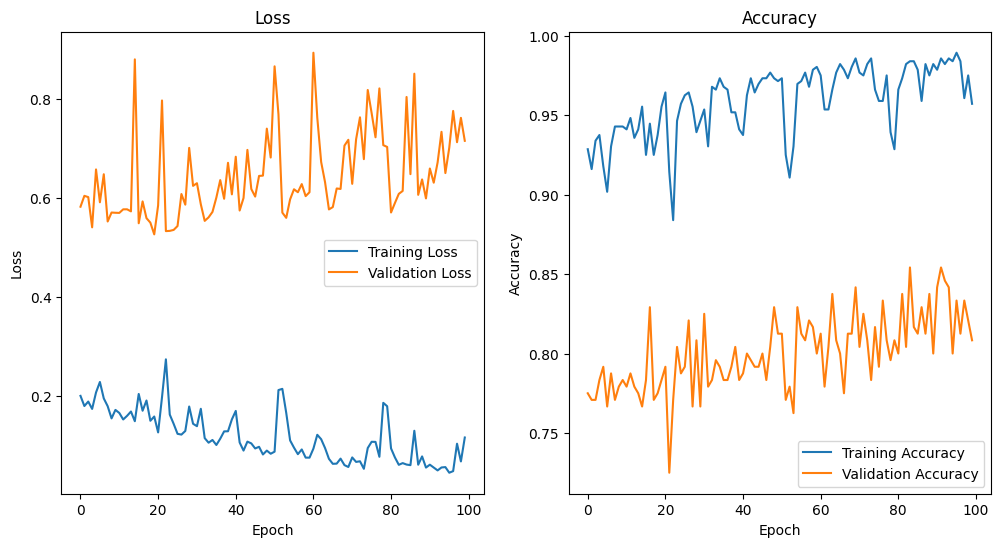

In [115]:
drawHistory(hist)

In [116]:
o = model.predict(x_test)

25/25 [==============================] - 1s 8ms/step


In [117]:
o = np.argmax(o,1)

In [118]:
df = pd.DataFrame(o)
df.columns = ['bGenuine']
df.index = range(800, 800+len(df))
df.index.name = 'num'
print(df)
df.to_csv('test_predict.csv')

      bGenuine
num           
800          1
801          1
802          0
803          0
804          1
...        ...
1595         0
1596         1
1597         1
1598         0
1599         1

[800 rows x 1 columns]


In [119]:
!kaggle competitions submit -c pknu-deep-learning-2024 -f test_predict.csv -m "Message"

100% 5.29k/5.29k [00:00<00:00, 7.85kB/s]
Successfully submitted to PKNU-Deep Learning-2024

In [ ]:
cd

In [141]:
cp finalProject.ipynb /content/gdrive/MyDrive/colab_repo_for_deep_learning/finalProject.ipynb

cp: cannot stat 'finalProject.ipynb': No such file or directory


In [124]:
cd ../colab_repo_for_deep_learning/

/content/gdrive/MyDrive/colab_repo_for_deep_learning


In [132]:
!git add *

In [133]:
!git commit -m "commit"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    colab_repo_for_deep_learning

no changes added to commit (use "git add" and/or "git commit -a")


In [134]:
!git config --global user.email "wkdghdwns199@naver.com"

In [128]:
!git config --global user.name "Jang Hong Joon"

In [135]:
!git push origin main

remote: Invalid username or password.
fatal: Authentication failed for 'https://github.com/wkdghdwns199/colab_repo_for_deep_learning.git/'
